## Liver Cirrhosis Stage Classification
### >Cirrhosis results from prolonged liver damage, leading to extensive scarring, often due to conditions like hepatitis or chronic alcohol consumption.This project aims at classifying the stage of lice cirrhosis based on some attributes.
### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('liver_cirrhosis.csv')
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [4]:
df.duplicated().sum()

15361

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000,9639.000000
mean,1910.982571,18429.717606,3.228571,371.706706,3.496118,97.027569,1973.572709,122.317487,123.587337,253.787605,10.713328,2.029152
std,1093.620373,3693.953156,4.512278,197.824339,0.382319,73.108854,1827.063380,47.653515,55.206301,95.740700,0.922026,0.809956
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1103.000000,15628.000000,0.800000,271.000000,3.290000,51.000000,1031.000000,89.900000,93.000000,188.000000,10.000000,1.000000
50%,1690.000000,18628.000000,1.300000,369.510563,3.520000,97.648387,1713.000000,122.556346,124.702128,249.000000,10.600000,2.000000
75%,2598.000000,20819.000000,3.300000,369.510563,3.760000,102.000000,1982.655769,134.850000,125.000000,307.000000,11.100000,3.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,3.000000


### N_Days: Number of days between registration and the earlier of death, transplantation, or study analysis time in 1986
### Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
### Drug: type of drug D-penicillamine or placebo
### Age: age in days
### Sex: M (male) or F (female)
### Ascites: presence of ascites N (No) or Y (Yes)
### Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
### Spiders: presence of spiders N (No) or Y (Yes)
### Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
### Bilirubin: serum bilirubin in [mg/dl]
### Cholesterol: serum cholesterol in [mg/dl]
### Albumin: albumin in [gm/dl]
### Copper: urine copper in [ug/day]
### Alk_Phos: alkaline phosphatase in [U/liter]
### SGOT: SGOT in [U/ml]
### Tryglicerides: triglicerides in [mg/dl]
### Platelets: platelets per cubic [ml/1000]
### Prothrombin: prothrombin time in seconds [s]
### Stage: histologic stage of disease ( 1, 2, or 3 )

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.columns

Index(['n_days', 'status', 'drug', 'age', 'sex', 'ascites', 'hepatomegaly',
       'spiders', 'edema', 'bilirubin', 'cholesterol', 'albumin', 'copper',
       'alk_phos', 'sgot', 'tryglicerides', 'platelets', 'prothrombin',
       'stage'],
      dtype='object')

### Distribution plots for numerical columns
### Results: most of the plots are gaussian distribution

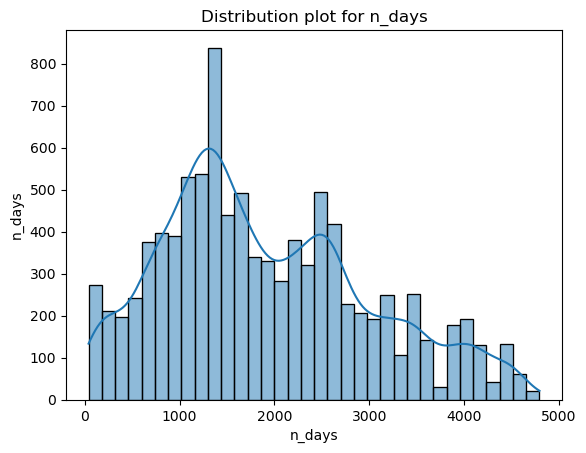

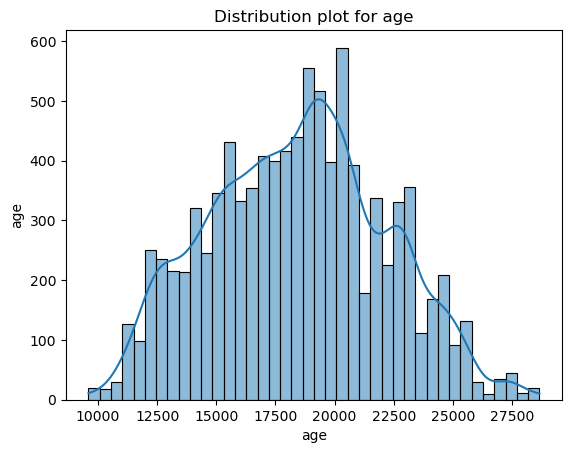

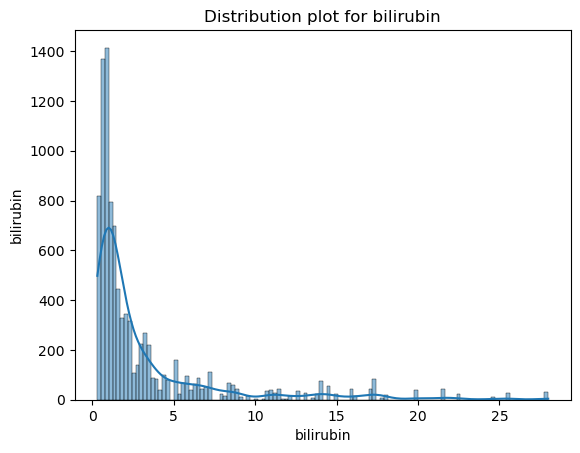

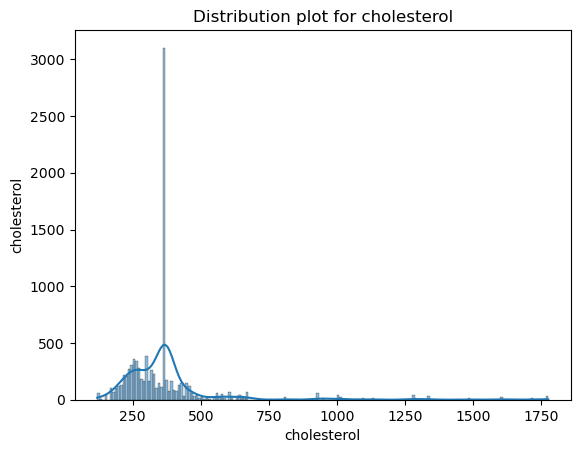

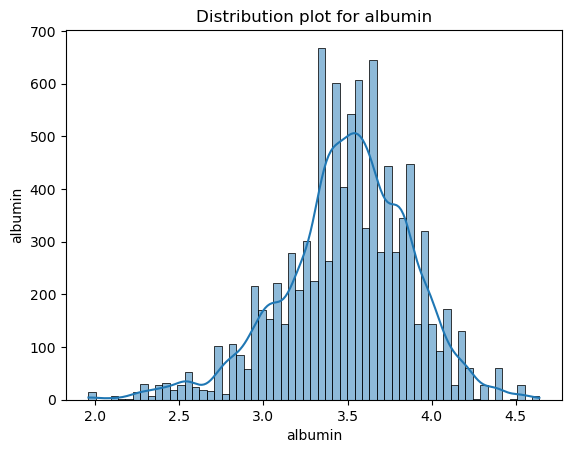

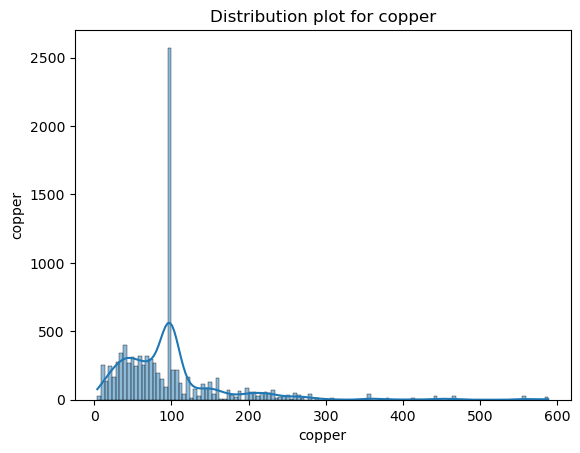

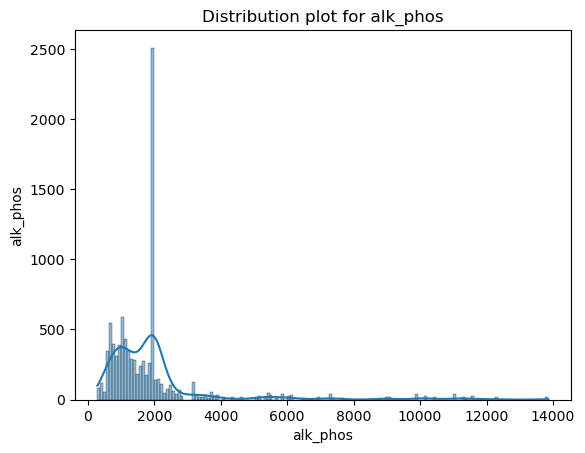

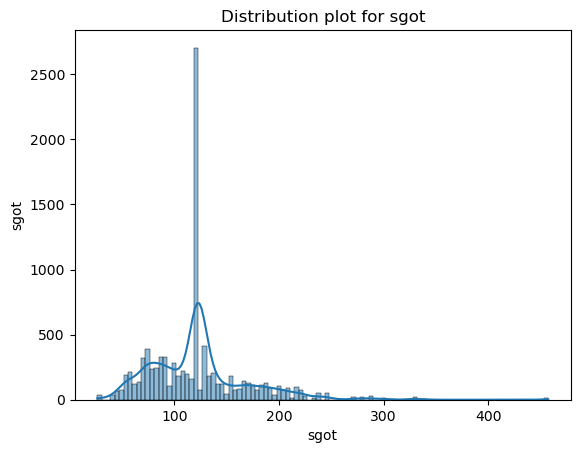

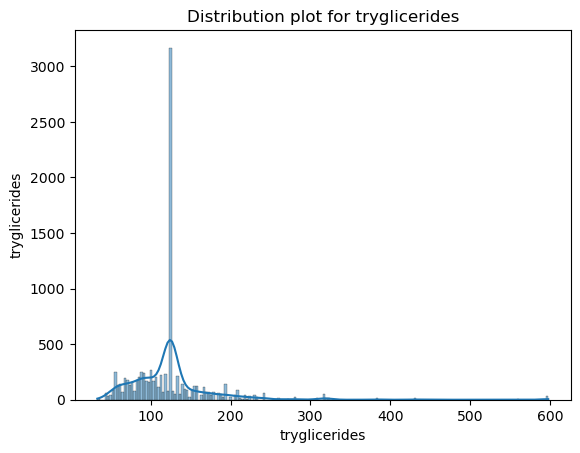

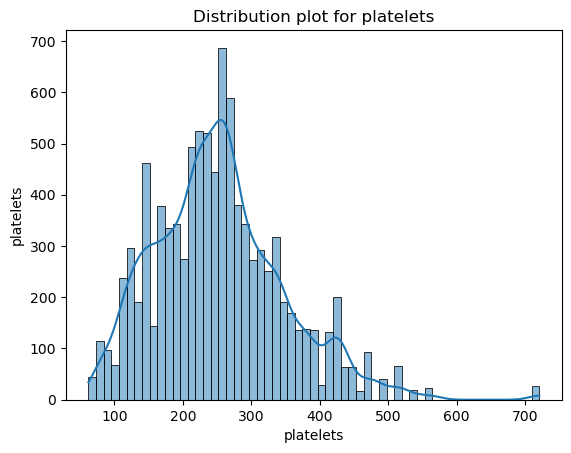

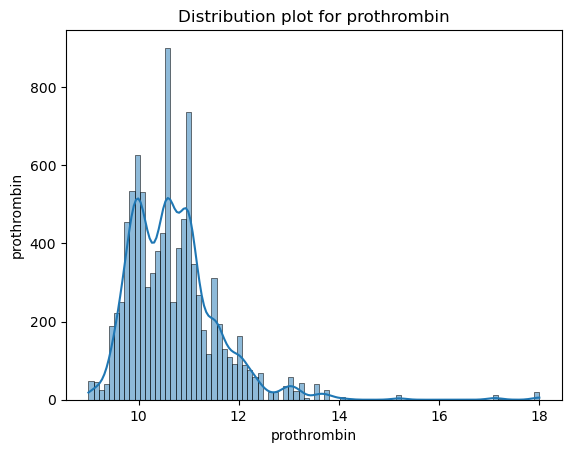

In [9]:
cols = ['n_days','age','bilirubin', 'cholesterol', 'albumin', 'copper','alk_phos','sgot', 'tryglicerides', 'platelets', 'prothrombin']

for i in cols:
    sns.histplot(df[i],kde=True)
    plt.title(f'Distribution plot for {i}')
    plt.ylabel(f'{i}')
    plt.show()


### Let's do a boxplot for numerical columns
### Results: ('bilirubin', 'cholesterol', 'albumin', 'copper','alk_phos','sgot', 'tryglicerides', 'platelets', 'prothrombin') seem to have outliers and we must check on that;

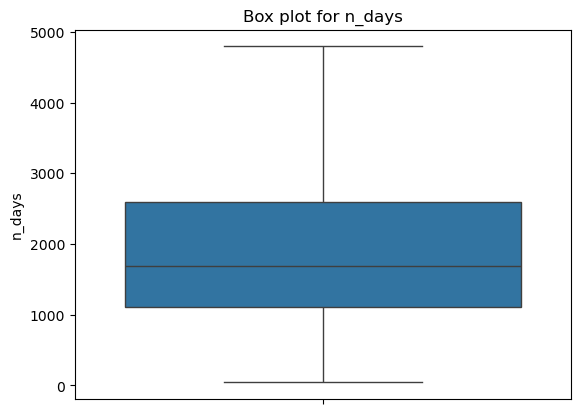

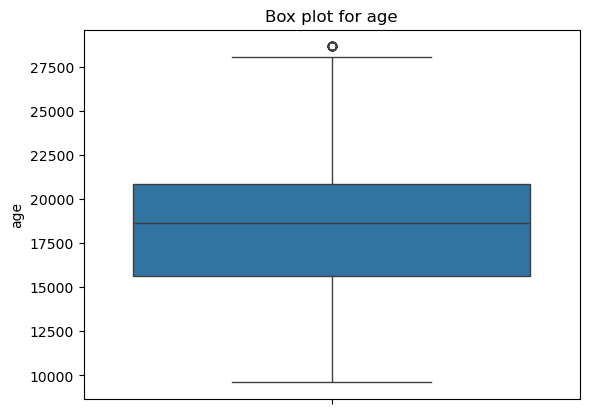

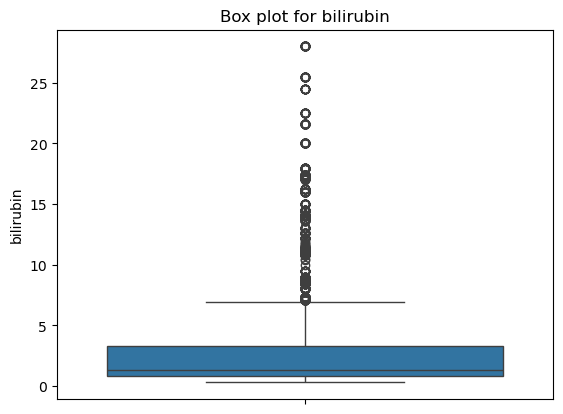

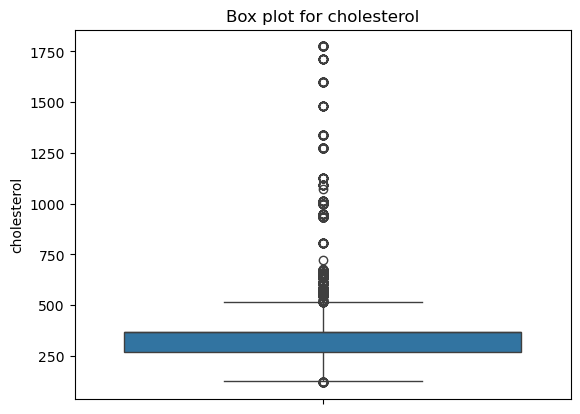

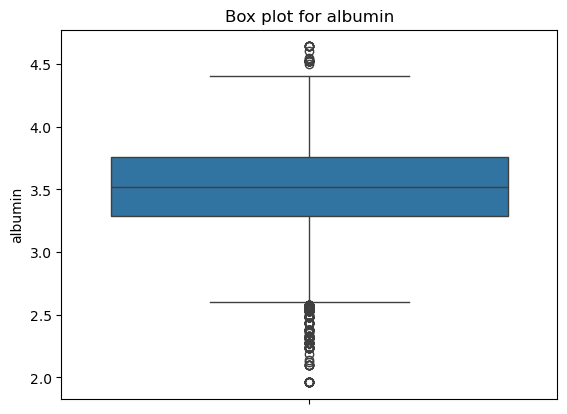

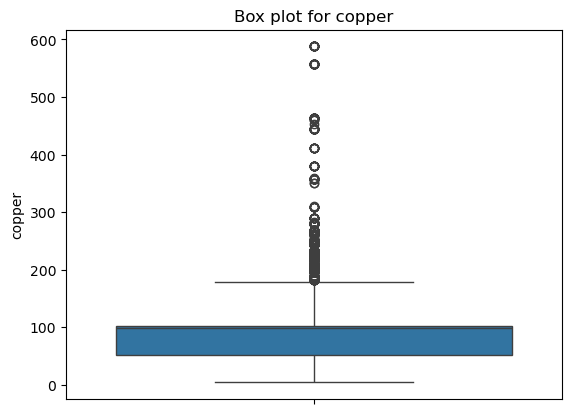

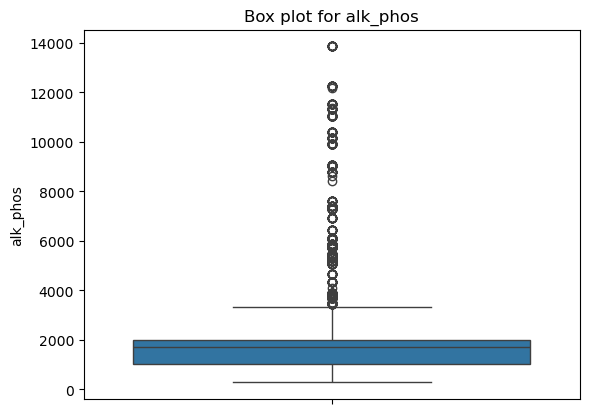

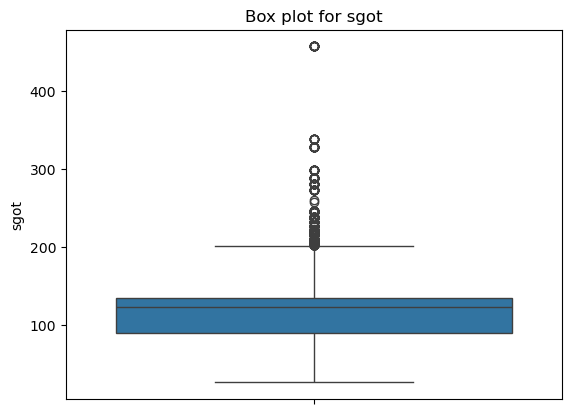

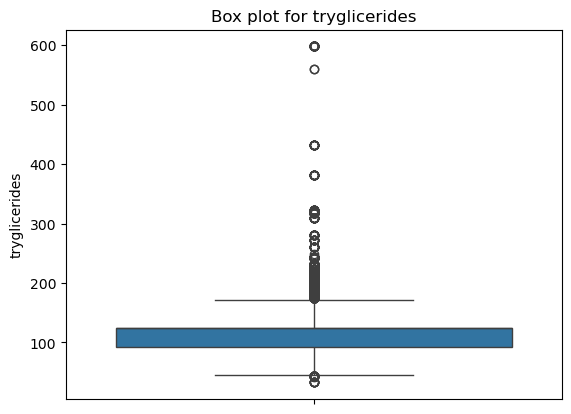

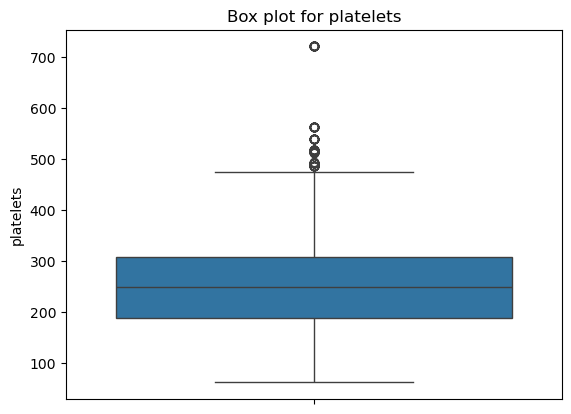

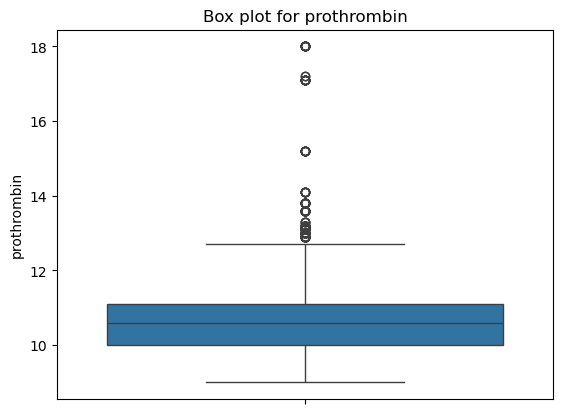

In [10]:
for i in cols:
    sns.boxplot(df[i])
    plt.title(f'Box plot for {i}')
    plt.ylabel(f'{i}')
    plt.show()

### Categorical columns

In [11]:
def modify_status(x):
    if x == 'C':
        return 'Censored'
    if x == 'CL':
        return 'Censored due to liver toxic'
    else:
        return 'Death'
df.status = df.status.apply(modify_status)
df.status.value_counts()

status
Censored                       5325
Death                          3705
Censored due to liver toxic     609
Name: count, dtype: int64

<Axes: xlabel='status', ylabel='count'>

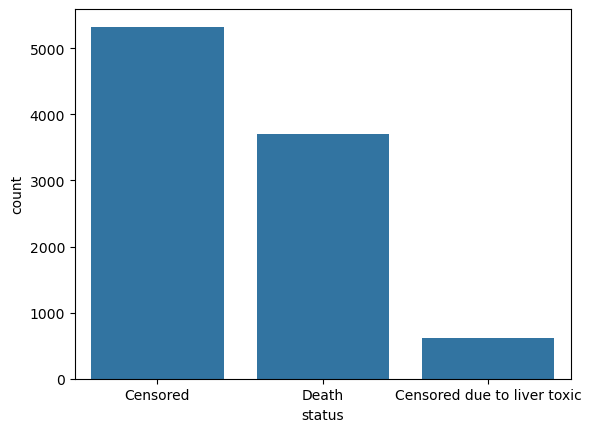

In [12]:
sns.countplot(x=df.status)

In [13]:
df.drug.value_counts()

drug
Placebo            6212
D-penicillamine    3427
Name: count, dtype: int64

<Axes: xlabel='status', ylabel='count'>

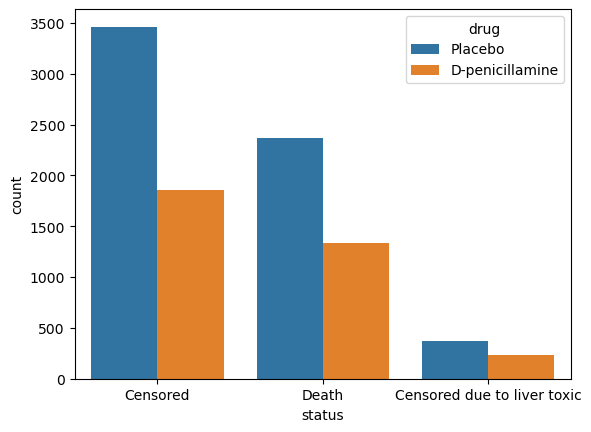

In [14]:
sns.countplot(x=df.status, hue=df.drug)

In [15]:
df.sex.value_counts()

sex
F    8560
M    1079
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

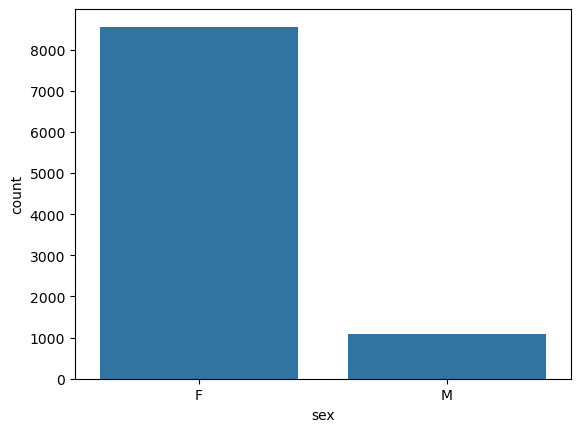

In [16]:
sns.countplot(x=df.sex)

<Axes: xlabel='status', ylabel='count'>

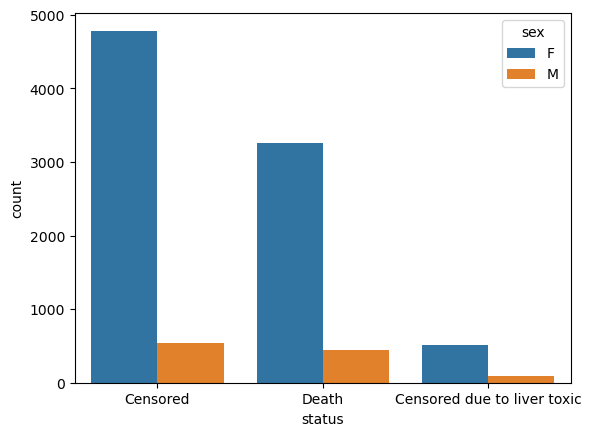

In [17]:
sns.countplot(x=df.status, hue=df.sex)

In [18]:
df.columns

Index(['n_days', 'status', 'drug', 'age', 'sex', 'ascites', 'hepatomegaly',
       'spiders', 'edema', 'bilirubin', 'cholesterol', 'albumin', 'copper',
       'alk_phos', 'sgot', 'tryglicerides', 'platelets', 'prothrombin',
       'stage'],
      dtype='object')

In [19]:
df.ascites.value_counts()

ascites
N    6329
Y    3310
Name: count, dtype: int64

<Axes: xlabel='ascites', ylabel='count'>

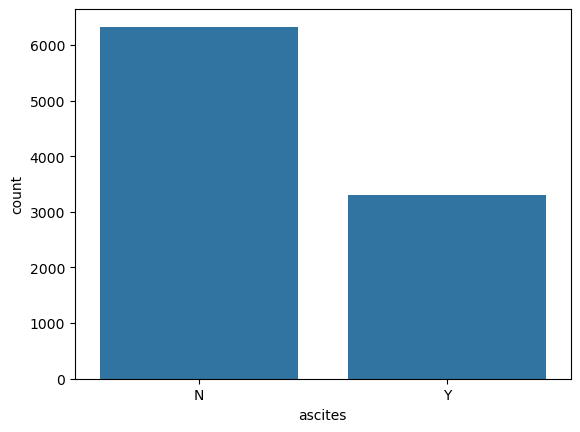

In [20]:
sns.countplot(x=df.ascites)

In [21]:
df.hepatomegaly.value_counts()

hepatomegaly
N    5904
Y    3735
Name: count, dtype: int64

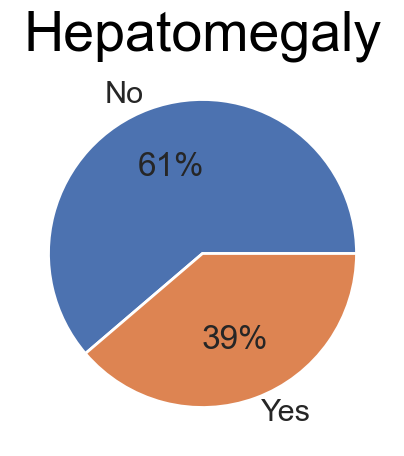

In [22]:
labels=['No','Yes']
values=df['hepatomegaly'].value_counts().values

sns.set_theme(context='poster')
plt.figure(figsize=(5,5))
plt.title('Hepatomegaly', color="Black",fontsize=40)

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.show()

In [23]:
df.spiders.value_counts()

spiders
N    4960
Y    4679
Name: count, dtype: int64

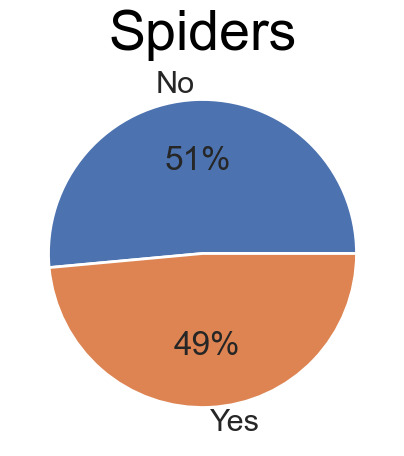

In [24]:
labels=['No','Yes']
values=df['spiders'].value_counts().values

sns.set_theme(context='poster')
plt.figure(figsize=(5,5))
plt.title('Spiders', color="Black",fontsize=40)

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.show()

In [25]:
def modify_edema(x):
    if x == 'N':
        return 'No Edema/Diuretic Therapy'
    if x == 'S':
        return 'Edema resolved by Diuretics'
    else:
        return 'Edema despite Diuretic therapy'
    
df.edema = df.edema.apply(modify_edema)
df.edema.value_counts()

edema
No Edema/Diuretic Therapy         8055
Edema resolved by Diuretics       1227
Edema despite Diuretic therapy     357
Name: count, dtype: int64

In [26]:
df.stage.value_counts()

stage
2    3308
3    3306
1    3025
Name: count, dtype: int64

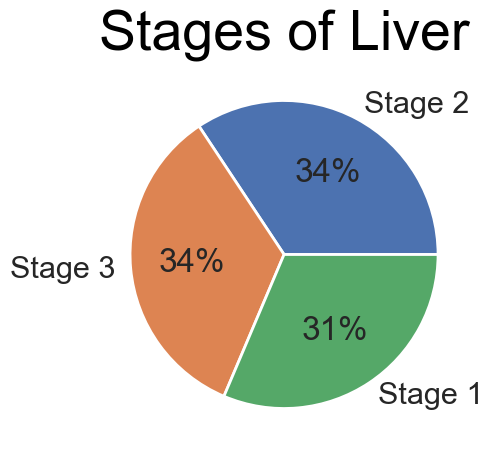

In [27]:
labels=['Stage 2','Stage 3','Stage 1']
values=df['stage'].value_counts().values

sns.set_theme(context='poster')
plt.figure(figsize=(5,5))
plt.title('Stages of Liver', color="Black",fontsize=40)

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.show()

### Let's remove outliers

In [28]:
df.shape

(9639, 19)

In [29]:
columns = ['bilirubin', 'cholesterol', 'albumin', 'copper','alk_phos','sgot', 'tryglicerides', 'platelets', 'prothrombin']
for col in columns:
    upper_bound = df[col].mean() + (2*df[col].std())
    lower_bound = df[col].mean() - (2*df[col].std())
    df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
    
df.shape

(6535, 19)

In [30]:
df.head()

,n_days,status,drug,age,sex,ascites,hepatomegaly,spiders,edema,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin,stage
1,1230,Censored,Placebo,19724,M,Y,N,Y,No Edema/Diuretic Therapy,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,Censored,Placebo,11839,F,N,N,N,No Edema/Diuretic Therapy,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,Death,Placebo,16467,F,N,N,N,No Edema/Diuretic Therapy,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,Death,Placebo,21699,F,N,Y,N,No Edema/Diuretic Therapy,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1
6,1418,Censored,Placebo,23011,F,Y,N,Y,No Edema/Diuretic Therapy,1.3,291.0,3.44,75.0,1082.0,85.00,195.0,156.0,10.3,2


### Converting age column to years

In [31]:
df.age = df.age.apply(lambda x:x/365)

In [32]:
df.age = df.age.astype('int64')
df.head()

,n_days,status,drug,age,sex,ascites,hepatomegaly,spiders,edema,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin,stage
1,1230,Censored,Placebo,54,M,Y,N,Y,No Edema/Diuretic Therapy,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,Censored,Placebo,32,F,N,N,N,No Edema/Diuretic Therapy,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,Death,Placebo,45,F,N,N,N,No Edema/Diuretic Therapy,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,Death,Placebo,59,F,N,Y,N,No Edema/Diuretic Therapy,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1
6,1418,Censored,Placebo,63,F,Y,N,Y,No Edema/Diuretic Therapy,1.3,291.0,3.44,75.0,1082.0,85.00,195.0,156.0,10.3,2


In [33]:
df.drop('n_days',axis=1,inplace=True)

### Making labesl 0,1,2 => 1,2,3

In [34]:
def stage(x):
    if x == 1:
        return 0
    if x == 2:
        return 1
    if x == 3:
        return 2
df.stage = df.stage.apply(stage)
df.head()

,status,drug,age,sex,ascites,hepatomegaly,spiders,edema,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin,stage
1,Censored,Placebo,54,M,Y,N,Y,No Edema/Diuretic Therapy,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,1
2,Censored,Placebo,32,F,N,N,N,No Edema/Diuretic Therapy,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,1
3,Death,Placebo,45,F,N,N,N,No Edema/Diuretic Therapy,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,1
4,Death,Placebo,59,F,N,Y,N,No Edema/Diuretic Therapy,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,0
6,Censored,Placebo,63,F,Y,N,Y,No Edema/Diuretic Therapy,1.3,291.0,3.44,75.0,1082.0,85.00,195.0,156.0,10.3,1


### Importing sklearn libraries

In [37]:
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

### Building a pipeline for data scaling and one hot encoding

In [38]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
scaler = StandardScaler()
encoder = OneHotEncoder()
cat_cols = ['status','drug','sex','ascites','hepatomegaly','spiders','edema']
num_cols = ['age','bilirubin','cholesterol','albumin','copper','alk_phos','sgot','tryglicerides','platelets','prothrombin']

cat_pipeline = Pipeline(steps=[
    ('encoder',OneHotEncoder()),
    ('scaler',StandardScaler(with_mean=False))
])
num_pipeline = Pipeline(steps=[
    ('scaler',StandardScaler())
])

preprocessor = ColumnTransformer([
    ('cat_pipeline',cat_pipeline,cat_cols),
    ('num_pipeline',num_pipeline,num_cols)
])

### Creating dependent and independent features and splitting data into train,test

In [39]:
X = df.drop('stage',axis=1)
y = df.stage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
X_train

,status,drug,age,sex,ascites,hepatomegaly,spiders,edema,bilirubin,cholesterol,albumin,copper,alk_phos,sgot,tryglicerides,platelets,prothrombin
3668,Death,Placebo,63,F,Y,N,Y,No Edema/Diuretic Therapy,0.7,369.510563,3.40,97.648387,1982.655769,122.556346,124.702128,371.0,10.9
1499,Censored,D-penicillamine,56,F,N,Y,Y,No Edema/Diuretic Therapy,0.7,303.000000,4.19,81.000000,1584.000000,111.600000,156.000000,221.0,10.6
19612,Censored,D-penicillamine,40,F,N,N,N,No Edema/Diuretic Therapy,1.9,448.000000,3.83,60.000000,1052.000000,127.100000,175.000000,181.0,9.8
290,Censored,Placebo,64,M,N,N,Y,No Edema/Diuretic Therapy,1.9,448.000000,3.83,60.000000,1052.000000,127.100000,175.000000,336.0,9.1
20021,Censored,D-penicillamine,51,F,N,N,N,No Edema/Diuretic Therapy,1.1,414.000000,3.44,80.000000,1003.000000,99.000000,55.000000,271.0,9.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10395,Censored,D-penicillamine,35,M,N,N,N,No Edema/Diuretic Therapy,8.5,194.000000,2.98,196.000000,815.000000,163.000000,78.000000,344.0,10.6
15634,Censored,Placebo,52,F,Y,N,Y,No Edema/Diuretic Therapy,0.7,369.510563,2.93,97.648387,1982.655769,122.556346,124.702128,231.0,10.6
15798,Death,Placebo,50,M,N,N,N,No Edema/Diuretic Therapy,2.7,369.510563,3.35,97.648387,1982.655769,122.556346,124.702128,293.0,9.8
16433,Censored,Placebo,69,F,N,Y,N,No Edema/Diuretic Therapy,1.5,369.510563,3.42,97.648387,1982.655769,122.556346,124.702128,236.0,9.9


### Fitting the preprocessor object

In [41]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [42]:
models = {
    'Logistic Regression':LogisticRegression(),
    'SVC':SVC(),
    'KNeighbours':KNeighborsClassifier(),
    'Cat Boost':CatBoostClassifier(),
    'XGB':XGBClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),  
}

### Fitting different models then printing their accuracy

In [43]:
report = {}
print('Modes Outcomes')
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    score = accuracy_score(y_test,prediction)
    report[list(models.keys())[i]] = score
best_score = max(sorted(list(report.values())))
for k,v in report.items():
    if v == best_score:
        best_model_name = k
        break
print(report)
print(f"{best_model_name} is the best model with accuracy of {best_score}")

Modes Outcomes
Learning rate set to 0.085808
0:	learn: 1.0698162	total: 959ms	remaining: 15m 57s
1:	learn: 1.0477761	total: 995ms	remaining: 8m 16s
2:	learn: 1.0237992	total: 1.01s	remaining: 5m 36s
3:	learn: 1.0035314	total: 1.03s	remaining: 4m 17s
4:	learn: 0.9842544	total: 1.04s	remaining: 3m 27s
5:	learn: 0.9683032	total: 1.06s	remaining: 2m 55s
6:	learn: 0.9538044	total: 1.07s	remaining: 2m 31s
7:	learn: 0.9443303	total: 1.08s	remaining: 2m 13s
8:	learn: 0.9360067	total: 1.09s	remaining: 1m 59s
9:	learn: 0.9235085	total: 1.1s	remaining: 1m 48s
10:	learn: 0.9132846	total: 1.11s	remaining: 1m 39s
11:	learn: 0.9049145	total: 1.12s	remaining: 1m 32s
12:	learn: 0.8945482	total: 1.13s	remaining: 1m 25s
13:	learn: 0.8875511	total: 1.14s	remaining: 1m 20s
14:	learn: 0.8789316	total: 1.15s	remaining: 1m 15s
15:	learn: 0.8695812	total: 1.16s	remaining: 1m 11s
16:	learn: 0.8598645	total: 1.18s	remaining: 1m 8s
17:	learn: 0.8518941	total: 1.19s	remaining: 1m 4s
18:	learn: 0.8459408	total: 1.2

162:	learn: 0.5108600	total: 2.83s	remaining: 14.5s
163:	learn: 0.5099758	total: 2.84s	remaining: 14.5s
164:	learn: 0.5091445	total: 2.86s	remaining: 14.5s
165:	learn: 0.5081766	total: 2.87s	remaining: 14.4s
166:	learn: 0.5069466	total: 2.88s	remaining: 14.4s
167:	learn: 0.5053711	total: 2.89s	remaining: 14.3s
168:	learn: 0.5039553	total: 2.9s	remaining: 14.3s
169:	learn: 0.5024366	total: 2.91s	remaining: 14.2s
170:	learn: 0.5009215	total: 2.92s	remaining: 14.2s
171:	learn: 0.4999061	total: 2.93s	remaining: 14.1s
172:	learn: 0.4985774	total: 2.94s	remaining: 14.1s
173:	learn: 0.4969119	total: 2.95s	remaining: 14s
174:	learn: 0.4955226	total: 2.96s	remaining: 14s
175:	learn: 0.4945468	total: 2.97s	remaining: 13.9s
176:	learn: 0.4936569	total: 2.98s	remaining: 13.9s
177:	learn: 0.4926663	total: 2.99s	remaining: 13.8s
178:	learn: 0.4906433	total: 3s	remaining: 13.8s
179:	learn: 0.4896147	total: 3.01s	remaining: 13.7s
180:	learn: 0.4886614	total: 3.02s	remaining: 13.7s
181:	learn: 0.487504

332:	learn: 0.3511409	total: 4.68s	remaining: 9.38s
333:	learn: 0.3507273	total: 4.7s	remaining: 9.36s
334:	learn: 0.3501345	total: 4.71s	remaining: 9.35s
335:	learn: 0.3497047	total: 4.72s	remaining: 9.33s
336:	learn: 0.3493097	total: 4.73s	remaining: 9.31s
337:	learn: 0.3489480	total: 4.74s	remaining: 9.29s
338:	learn: 0.3485964	total: 4.75s	remaining: 9.27s
339:	learn: 0.3481380	total: 4.76s	remaining: 9.25s
340:	learn: 0.3478795	total: 4.77s	remaining: 9.22s
341:	learn: 0.3474370	total: 4.78s	remaining: 9.2s
342:	learn: 0.3466906	total: 4.79s	remaining: 9.18s
343:	learn: 0.3461602	total: 4.8s	remaining: 9.16s
344:	learn: 0.3458860	total: 4.82s	remaining: 9.14s
345:	learn: 0.3453002	total: 4.83s	remaining: 9.13s
346:	learn: 0.3449678	total: 4.84s	remaining: 9.11s
347:	learn: 0.3445420	total: 4.85s	remaining: 9.09s
348:	learn: 0.3443520	total: 4.86s	remaining: 9.06s
349:	learn: 0.3438718	total: 4.87s	remaining: 9.04s
350:	learn: 0.3435000	total: 4.88s	remaining: 9.02s
351:	learn: 0.3

502:	learn: 0.2747552	total: 6.58s	remaining: 6.5s
503:	learn: 0.2743842	total: 6.59s	remaining: 6.49s
504:	learn: 0.2739231	total: 6.61s	remaining: 6.47s
505:	learn: 0.2735055	total: 6.62s	remaining: 6.46s
506:	learn: 0.2729162	total: 6.63s	remaining: 6.45s
507:	learn: 0.2725422	total: 6.64s	remaining: 6.43s
508:	learn: 0.2723291	total: 6.65s	remaining: 6.42s
509:	learn: 0.2719799	total: 6.66s	remaining: 6.4s
510:	learn: 0.2714927	total: 6.68s	remaining: 6.39s
511:	learn: 0.2711257	total: 6.69s	remaining: 6.38s
512:	learn: 0.2707192	total: 6.7s	remaining: 6.36s
513:	learn: 0.2704443	total: 6.71s	remaining: 6.35s
514:	learn: 0.2702268	total: 6.73s	remaining: 6.33s
515:	learn: 0.2700097	total: 6.74s	remaining: 6.32s
516:	learn: 0.2696702	total: 6.75s	remaining: 6.31s
517:	learn: 0.2691211	total: 6.76s	remaining: 6.29s
518:	learn: 0.2688982	total: 6.78s	remaining: 6.28s
519:	learn: 0.2684728	total: 6.79s	remaining: 6.27s
520:	learn: 0.2680257	total: 6.81s	remaining: 6.26s
521:	learn: 0.2

672:	learn: 0.2252029	total: 8.47s	remaining: 4.12s
673:	learn: 0.2250682	total: 8.49s	remaining: 4.11s
674:	learn: 0.2247188	total: 8.5s	remaining: 4.09s
675:	learn: 0.2242536	total: 8.51s	remaining: 4.08s
676:	learn: 0.2240144	total: 8.52s	remaining: 4.07s
677:	learn: 0.2237474	total: 8.53s	remaining: 4.05s
678:	learn: 0.2234677	total: 8.55s	remaining: 4.04s
679:	learn: 0.2232869	total: 8.56s	remaining: 4.03s
680:	learn: 0.2230595	total: 8.57s	remaining: 4.01s
681:	learn: 0.2229590	total: 8.58s	remaining: 4s
682:	learn: 0.2228248	total: 8.59s	remaining: 3.99s
683:	learn: 0.2226239	total: 8.6s	remaining: 3.97s
684:	learn: 0.2224813	total: 8.61s	remaining: 3.96s
685:	learn: 0.2220139	total: 8.62s	remaining: 3.94s
686:	learn: 0.2218286	total: 8.63s	remaining: 3.93s
687:	learn: 0.2216562	total: 8.64s	remaining: 3.92s
688:	learn: 0.2214830	total: 8.65s	remaining: 3.9s
689:	learn: 0.2213175	total: 8.66s	remaining: 3.89s
690:	learn: 0.2206711	total: 8.67s	remaining: 3.88s
691:	learn: 0.2202

836:	learn: 0.1909013	total: 10.4s	remaining: 2.02s
837:	learn: 0.1907384	total: 10.4s	remaining: 2s
838:	learn: 0.1903858	total: 10.4s	remaining: 1.99s
839:	learn: 0.1901957	total: 10.4s	remaining: 1.98s
840:	learn: 0.1901276	total: 10.4s	remaining: 1.97s
841:	learn: 0.1899306	total: 10.4s	remaining: 1.95s
842:	learn: 0.1897676	total: 10.4s	remaining: 1.94s
843:	learn: 0.1895963	total: 10.4s	remaining: 1.93s
844:	learn: 0.1893918	total: 10.4s	remaining: 1.92s
845:	learn: 0.1893084	total: 10.5s	remaining: 1.9s
846:	learn: 0.1891800	total: 10.5s	remaining: 1.89s
847:	learn: 0.1890619	total: 10.5s	remaining: 1.88s
848:	learn: 0.1890015	total: 10.5s	remaining: 1.87s
849:	learn: 0.1888645	total: 10.5s	remaining: 1.85s
850:	learn: 0.1886947	total: 10.5s	remaining: 1.84s
851:	learn: 0.1885139	total: 10.5s	remaining: 1.83s
852:	learn: 0.1883920	total: 10.5s	remaining: 1.81s
853:	learn: 0.1882535	total: 10.5s	remaining: 1.8s
854:	learn: 0.1881541	total: 10.6s	remaining: 1.79s
855:	learn: 0.187

{'Logistic Regression': 0.5410036719706243, 'SVC': 0.6664626682986536, 'KNeighbours': 0.6952264381884945, 'Cat Boost': 0.8867809057527539, 'XGB': 0.8965728274173806, 'Decision Tree': 0.7802937576499388, 'Random Forest': 0.8641370869033048}
XGB is the best model with accuracy of 0.8965728274173806


### XGB has the highest accuracy

In [44]:
classifier = models[best_model_name]

### Saving model and preprocessor

In [45]:
import pickle
data = {'model':classifier,'preprocessor':preprocessor}
with open('liver.pkl','wb') as file:
    pickle.dump(data,file)